<font color='red'>
<ol type='1'>
<li>Using an autoassociator for classification</li>
<ol type='a'>
<li>Create autoassociator and plot loss 5/5</li>
<li>Use autoassociator to classify images and plot trajectory 5/5</li>
</ol>
<li>Create a convolutional network for classification 10/10</li>
</ol>

Total: 20/20
</font>

<hr>

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of clothing images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Homework 7 Code

In [1]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt
import numpy.random as R
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

flabels = {0 : 't-shirt',
           1 : 'trousers',
           2 : 'pullover',
           3 : 'dress',
           4 : 'coat',
           5 : 'sandal',
           6 : 'shirt',
           7 : 'sneaker',
           8 : 'bag',
           9 : 'boot'}

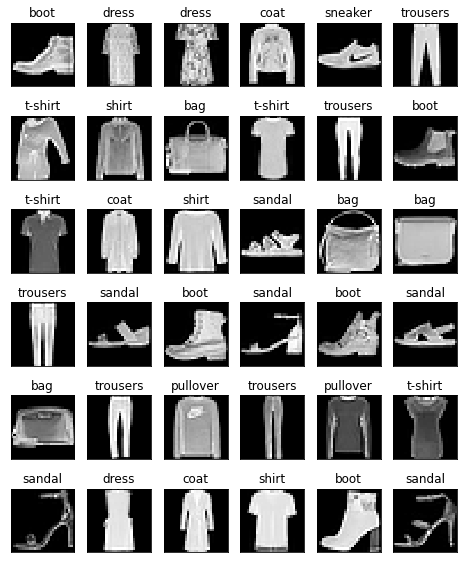

In [2]:
# display some images with their labels
fig = plt.figure(figsize=(8, 10))
N = 6
st_idx = R.randint(0, train_images.shape[0]-N*N-1)
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.imshow(train_images[st_idx+i], cmap='gray', interpolation='none')
    plt.title(flabels[train_labels[st_idx+i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

QUESTION 1A

In [3]:
#In the below cell, I am reshaping my training and testing images from a 60,000 by 28 by 28 array to a 60,000 by 784 array for the PCA Network
#and 10,000 by 28 by 28 array to a 10,000 by 784 array respectively
train_images_reshaped = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2]) #training patterns by n-in
test_images_reshaped = test_images.reshape(test_images.shape[0], test_images.shape[1]*train_images.shape[2])

How did I decide the number of hidden layers?

I was able to determine the number of hidden layers because a PCA network uses 1 hidden layer. I tried two or three hideen layers, and then plotted loss and val_loss by number of epochs, but those graphs did not plateau as low or as quickly as with 1 hidden layer.

How did I decide on the number of nodes per hidden layer?

I chose 300 nodes because I wanted to bottleneck from an input layer containing 784 nodes to a significantly smaller number. I tried 1, 200, 300, 400, 500, 600 and 700 nodes for my singular hidden layer, and the best bottleneck was seen by the loss and val_loss vs. number of epochs for 300 nodes. 

In [4]:
#creates a PCA network
network = models.Sequential()

#1 input layer, 1 hidden layers, and 1 output layer
nin = 784
nhid1 = 300
nout = 784

#adds the one hidden layer to the network
network.add(layers.Dense(nhid1,activation='linear', input_shape=(nin,)))
network.add(layers.Dense(nout,activation='linear'))

#compiles the network 
compile_network = network.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

train_images_reshaped1a = train_images_reshaped[0:int(train_images_reshaped.shape[0]/2)]

#trains the network
history = network.fit(train_images_reshaped1a,
                      train_images_reshaped1a,
                      validation_split=.2,
                      verbose = False,
                      epochs=20,
                      batch_size=100)

outputs = network.predict(train_images_reshaped1a)

In the below cell, I am plotting the first reduced image from the fashion MNIST database

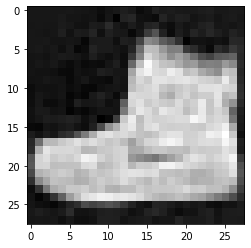

In [5]:
#showing the first image that have been reconstructed from a reduced dimensionality
out_1st = int (outputs.shape[1]**(1/2))
reshaped_out = outputs.reshape(outputs.shape[0], out_1st, out_1st)
reshaped_out[0,::]
plt.imshow(reshaped_out[0,::], cmap='gray', interpolation='none')

In [6]:
# get weights and biases from the autoassociator network
aaW = network.layers[0].get_weights()[0]
aaB = network.layers[0].get_weights()[1]

#passing the 2nd half of the images into the first half of the network
train_images_reshaped1b = train_images_reshaped[int(train_images_reshaped.shape[0]/2):]
red_dim_version_outs = np.dot(train_images_reshaped1b,aaW) + aaB

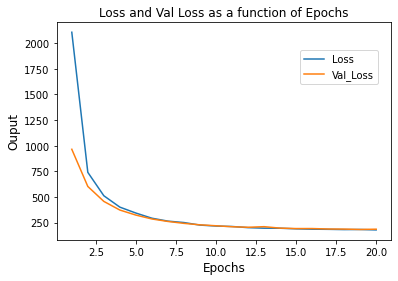

In [7]:
# Creates a function that takes in the parameters for title, a label for the x axis, 
# a label for the y axis, font size, input values (x values), a list of list containing the y values from the operation done to the input values, 
# and the name of the function  With this information, a certain number of lines (dependent on the number of functions) are plotted on the same figure 
# containing a x label, y label, title, and a figure legend.

def overlap_plot (title, xlabel, ylabel, fontsize, inputs, list_func, names_func):
    fig = plt.figure()
    plt.xlabel(xlabel, fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    plt.title(title, fontsize = fontsize)
    graph_list = []
    for ind_func in list_func:
        p, = plt.plot(inputs, ind_func)
        graph_list.append(p)
    plt.figlegend(graph_list, names_func, bbox_to_anchor=(0.88, 0.80))
    
#the number of epochs; this is your y values
n_epochs = len(history.history['loss'])

#an array from 1 to the number of epochs; this is your x values
input_array = np.arange(1,(n_epochs+1),1)

#calculations to calculate the accuracy, loss, and val_loss for the neural network
loss = history.history['loss']
val_loss =  history.history['val_loss']

#a list containing the values accuracy, loss, and val_loss
func_list = [loss, val_loss]

#a list containing the names of accuracy, loss, and val_loss
names_func = ['Loss', 'Val_Loss']

#calls the above function
overlap_plot ('Loss and Val Loss as a function of Epochs', 'Epochs', 'Ouput', 12, input_array, func_list, names_func)

QUESTION 1B

How did I decide the number of hidden layers?

I decided upon the number of hidden layers by trying two hidden layers, three hidden layers, four hidden layers, and determined
that one hidden layers with 50 nodes was the best to get the best loss and val_loss

How did I decide on the number of nodes per hidden layer?

I decided upon the number of nodes per hidden layer through trying out different combinations, but eventually settled at
50 because after trying 100, 200, and 300; I realized that 50 was the sweet spot to get a great accuracy + not jeaporodizing 
my val_loss and loss

How did I decide the activation function?

I decided upon my activation function through trying out linear + linear, relu + relu, sigmoid + relu, sigmoid + sigmoid and
was able to determine that sigmoid + sigmoid was the best combination for this network

How did I choose the number of epochs and batch size?

I tried out different combinations, and I was able to determine that a batch_size of 70 with the number of epochs being 25 is a good combination because it produced again the best accuracy, lowest loss, and lowest val_loss. Other combinations that I used were epochs being 40 with the batch size being 5000, and then the epochs being 30 with the batch size being 200. And these still didn't get to a high enough accuracy that I wanted, even though the loss and val_loss were good. So I setteled at the epochs being 25 and the batch_size being 70

In [8]:
#takes the remaining images and classifies them

network_1b = models.Sequential()

#1 input layer, 1 hidden layers, and 1 output layer
nin = red_dim_version_outs.shape[1]
nhid1 = 50
nout = 10

#adds the one hidden layer to the network
network_1b.add(layers.Dense(nhid1,activation='sigmoid', input_shape=(nin,)))
network_1b.add(layers.Dense(nout,activation='sigmoid'))

#compiles the network 
compile_network_1b = network_1b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy', 'mse'])

new_train_labels = train_labels[int(train_labels.shape[0]/2):] #2nd half of the input
new_train_labels1 = to_categorical(new_train_labels) #CONVERTS TO ONE-HOT vectors

#trains the network
history_1b = network_1b.fit(red_dim_version_outs,
                      new_train_labels1,
                      validation_split=.2, 
                      verbose = False,
                      epochs=25,
                      batch_size=70)

In the below cell, I am testing my network using my test images and then reporting its performance. The accuracy of the test images were close to my accuracy with the training images, but what is more important is that the loss is very low, which is critical to take note of.

In [9]:
red_dim_version_test_outs = np.dot(test_images_reshaped,aaW) + aaB
new_test_labels = to_categorical(test_labels)
network_evaluation = network_1b.evaluate(red_dim_version_test_outs, new_test_labels)

313/313 [==============================] - 0s 833us/step - loss: 0.0246 - accuracy: 0.8358 - mse: 0.0246


In the below cell, Plots Loss and Val_Loss as function of Epochs for Network_1b

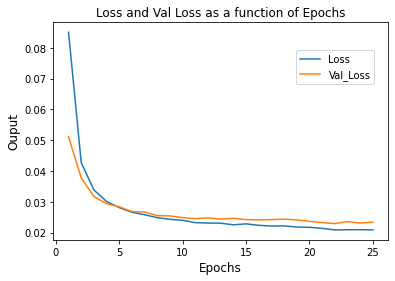

In [10]:
#the number of epochs; this is your y values
n_epochs_1b = len(history_1b.history['loss'])

#an array from 1 to the number of epochs; this is your x values
input_array = np.arange(1,(n_epochs_1b+1),1)

#calculations to calculate the accuracy, loss, and val_loss for the neural network
loss_1b = history_1b.history['loss']
val_loss_1b =  history_1b.history['val_loss']

#a list containing the values accuracy, loss, and val_loss
func_list = [loss_1b, val_loss_1b]

#calls the above function
overlap_plot ('Loss and Val Loss as a function of Epochs', 'Epochs', 'Ouput', 12, input_array, func_list, names_func)

QUESTION 2: Convolutional Neural Networks

How did I decide the number of convolutional layers?

I decided the number of convolutional layers by trying 1, 2 and 3 convolutional layers. Two convolutional
layers gave me the best result as seen by a greater accuracy and lower loss and val_loss when compared to just 
1 convolutional layer. 

How did I decide on the number of dense layers?

I decided upong two dense layers since after trying one dense layer, I wasn't getting a high enough accuracy. So after adjusting, and playing around with three dense layers, I chose two because it was the minimum layers that I 
needed to get the results that I wanted 

How did I decide upon the number of hidden units?

I decided upon 20 hidden nodes as seen by by dense layer. I tried 15 hidden nodes, 30 hidden nodes, and I landed 
upon 20 because it was the most optimum, while 15 and 30 drastically changed my val_loss. 

How did I choose the number of epochs and batch size?

I chose the number of epochs and batch size through experimentation. I tried 20 epochs and a batch size of 50 as 
well as 30 epochs and a batch size of 100, but I eventually settled upon 10 epochs with a batch size of 35 because
I realized that this gave me my greatest accuracy, lowest loss and val_loss, and most importantly did not overfit 
my network.


In [11]:
network2 = models.Sequential()
network2.add(layers.Conv2D(16, (3,3), strides = (1,1), activation='relu', 
                          input_shape=(int(train_images.shape[1]), int(train_images.shape[2]),1)))
network2.add(layers.MaxPooling2D((2,2)))
network2.add(layers.Conv2D(16, (3,3), activation='relu'))
network2.add(layers.MaxPooling2D((2,2)))
network2.add(layers.Flatten())
network2.add(layers.Dense(15, activation='relu'))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_labels_onehot = to_categorical(train_labels) 
test_labels_onehot = to_categorical(test_labels) 
conv_train_images_reshaped = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
conv_test_images_reshaped = test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)

history2 = network2.fit(conv_train_images_reshaped, train_labels_onehot, validation_split=.1, epochs=10, batch_size=50)
test_loss, test_accuracy = network2.evaluate(conv_test_images_reshaped, test_labels_onehot)                  

Epoch 1/10
1080/1080 [==============================] - 16s 14ms/step - loss: 2.0974 - accuracy: 0.1892 - val_loss: 1.9326 - val_accuracy: 0.2225
Epoch 2/10
1080/1080 [==============================] - 16s 15ms/step - loss: 1.5373 - accuracy: 0.3928 - val_loss: 1.3350 - val_accuracy: 0.4553
Epoch 3/10
1080/1080 [==============================] - 16s 15ms/step - loss: 1.2784 - accuracy: 0.4639 - val_loss: 1.2545 - val_accuracy: 0.4668
Epoch 4/10
1080/1080 [==============================] - 17s 15ms/step - loss: 1.2051 - accuracy: 0.4841 - val_loss: 1.0593 - val_accuracy: 0.5668
Epoch 5/10
1080/1080 [==============================] - 17s 15ms/step - loss: 0.8920 - accuracy: 0.6728 - val_loss: 0.7211 - val_accuracy: 0.7582
Epoch 6/10
1080/1080 [==============================] - 16s 15ms/step - loss: 0.5909 - accuracy: 0.7818 - val_loss: 0.5489 - val_accuracy: 0.8028
Epoch 7/10
1080/1080 [==============================] - 16s 15ms/step - loss: 0.4943 - accuracy: 0.8110 - val_loss: 0.4747 -

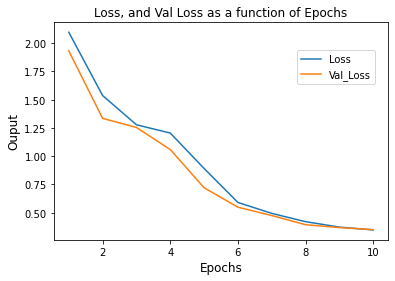

In [12]:
#calculations to calculate the accuracy, loss, and val_loss for the neural network
loss1 = history2.history['loss']
val_loss1 =  history2.history['val_loss']
func_list1 = [loss1, val_loss1]

#the number of epochs; this is your y values
n_epochs1 = len(history2.history['loss'])

#an array from 1 to the number of epochs; this is your x values
input_array = np.arange(1,(n_epochs1+1),1)

#calls the above function
overlap_plot ('Loss, and Val Loss as a function of Epochs', 'Epochs', 'Ouput', 12, input_array, func_list1, names_func)